# Implementation of CNN using Keras

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
#importing necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#ml packs
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
from keras.models import Model
from keras.layers import Input,InputLayer
from keras import backend as K

Using TensorFlow backend.


#### DATA PREPARATION

In [3]:

#data preparation
def prep_data(raw):
    img_rows, img_cols = 28, 28
    num_classes = 10
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y , img_rows, img_cols, num_classes, num_images
#extracting data from kaggle
train = "/kaggle/input/digit-recognizer/train.csv"
#loading DATA 
mnist_data = np.loadtxt(train, skiprows=1, delimiter=',')
x, y, img_rows, img_cols, num_classes, num_images= prep_data(mnist_data)
print('input shape : {}'.format(x.shape))
print('output shape : {}'.format(y.shape))

input shape : (42000, 28, 28, 1)
output shape : (42000, 10)


#### MODELIING 


In [4]:
#creating a model object 
model_1 = Sequential()


In [ ]:
#First convolutional layer
model_1.add(Conv2D(filters = 16,kernel_size = 5,activation = 'relu',input_shape = (img_rows, img_cols, 1)))
model_1.add(MaxPooling2D(pool_size=(2,2))

In [6]:
#Second convolutional layer
model_1.add(Conv2D(filters = 32, kernel_size = 5,activation = 'relu'))

In [7]:
#adding the 2nd pooling layer
model_1.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
#Flattening layer
model_1.add(Flatten())

In [9]:
#Hidden layer
model_1.add(Dense(units= 64,activation='relu'))
model_1.add(Dense(units = num_classes,activation = 'softmax'))

In [10]:
model_1.compile(loss = "categorical_crossentropy",optimizer = 'adam',metrics = ['accuracy'])

In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [12]:
#train_test_spilt
model_1.fit(x,y,batch_size = 100,epochs = 10,validation_split = 0.2 )

Epoch 1/10
336/336 [==============================] - 10s 31ms/step - loss: 0.3267 - accuracy: 0.9068 - val_loss: 0.0982 - val_accuracy: 0.9717
Epoch 2/10
336/336 [==============================] - 10s 30ms/step - loss: 0.0943 - accuracy: 0.9706 - val_loss: 0.0757 - val_accuracy: 0.9783
Epoch 3/10
336/336 [==============================] - 11s 32ms/step - loss: 0.0652 - accuracy: 0.9795 - val_loss: 0.0617 - val_accuracy: 0.9799
Epoch 4/10
336/336 [==============================] - 10s 30ms/step - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.0510 - val_accuracy: 0.9842
Epoch 5/10
336/336 [==============================] - 10s 31ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 0.0499 - val_accuracy: 0.9860
Epoch 6/10
336/336 [==============================] - 10s 31ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0478 - val_accuracy: 0.9869
Epoch 7/10
336/336 [==============================] - 10s 30ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0418 - val_accuracy:

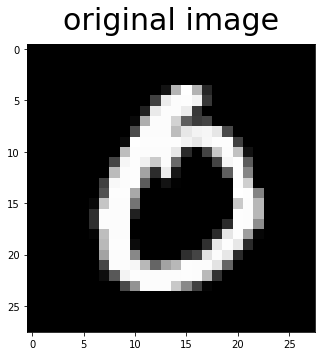

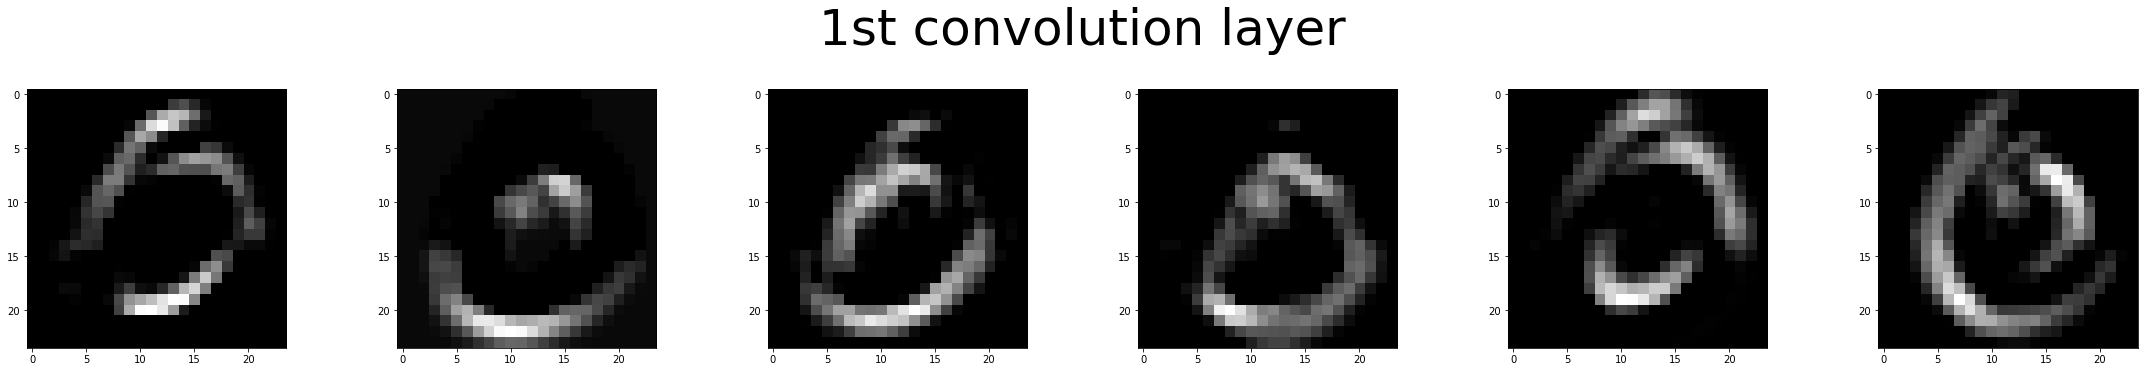

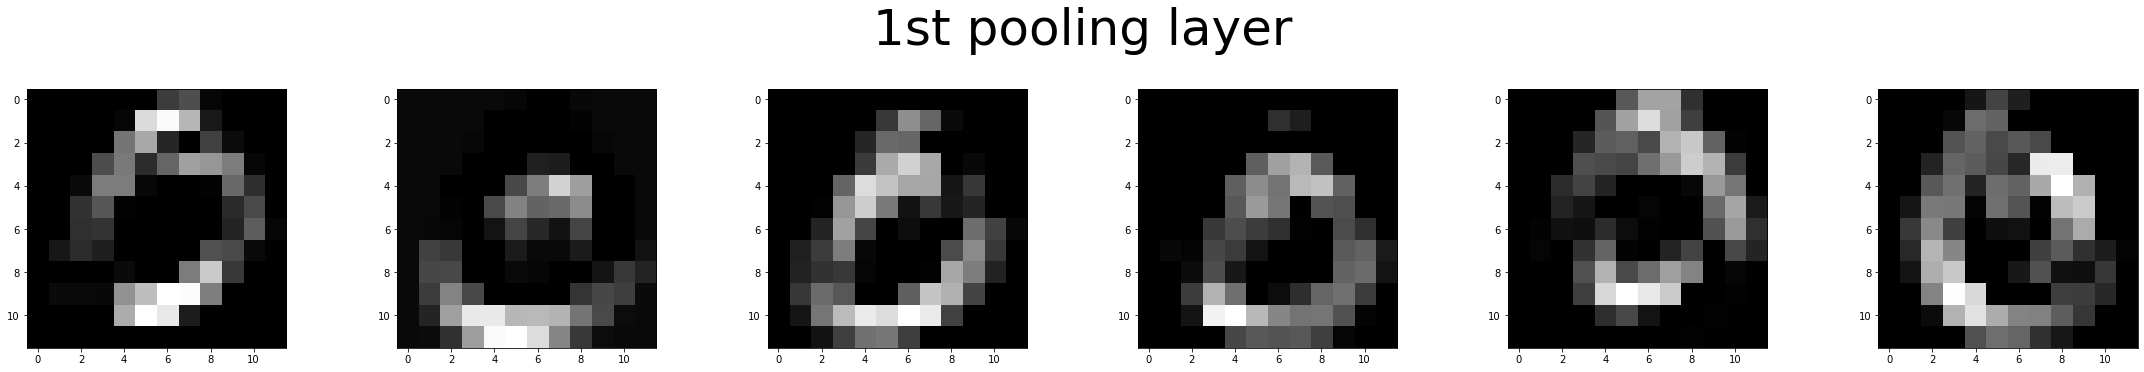

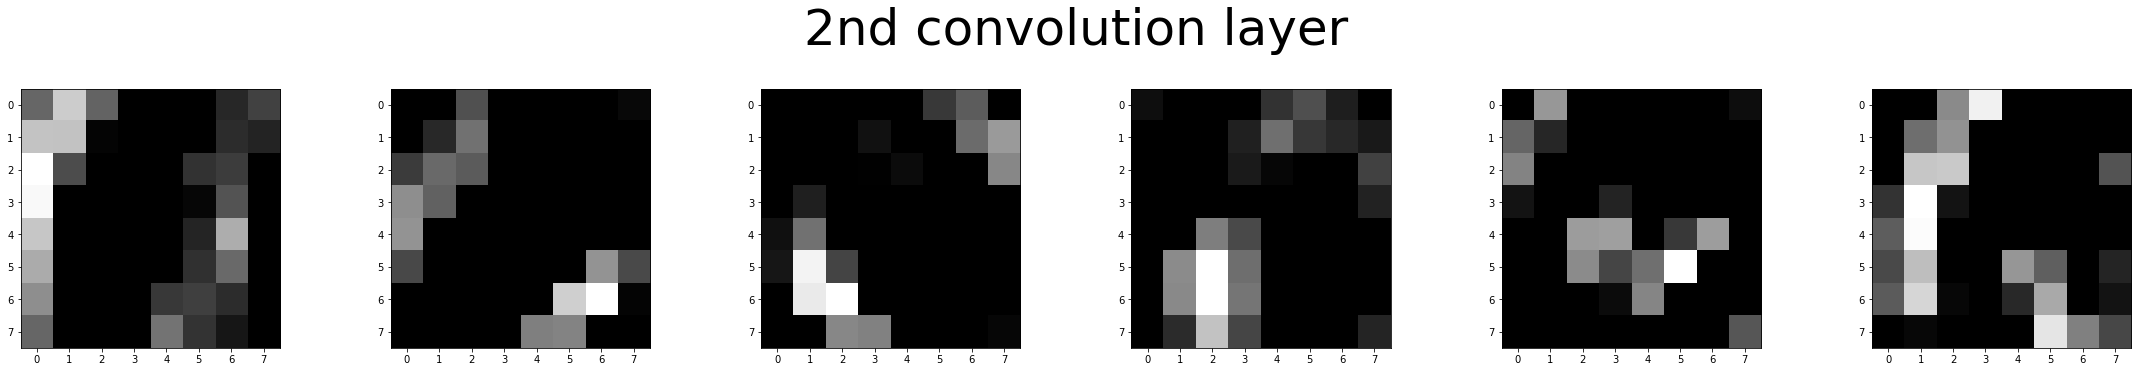

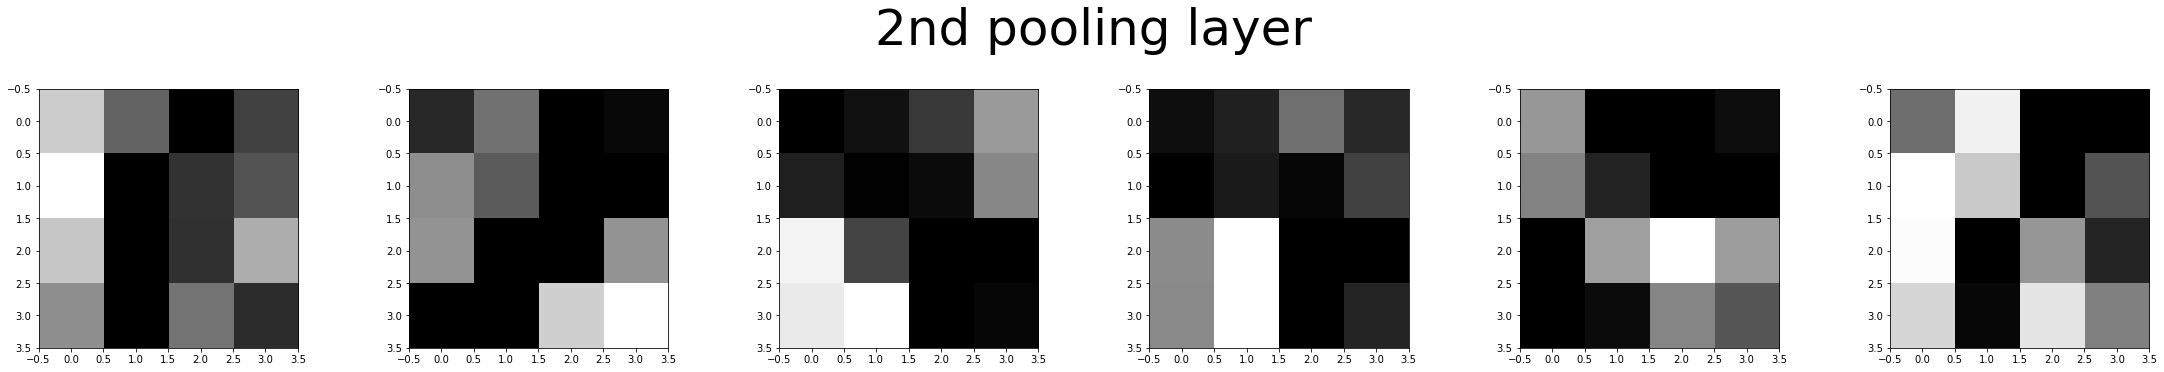

In [13]:
#visualisation function 
def image_journey(img_num):
    layer_outputs = [layer.output for layer in model_1.layers[:4]]
    activation_model = keras.Model(inputs=model_1.inputs, outputs=layer_outputs)
    activations = activation_model.predict(x[img_num].reshape(1,28,28,1))
    layer_list=['1st convolution layer','1st pooling layer','2nd convolution layer','2nd pooling layer']
    fig, ax = plt.subplots(1, 1 ,figsize = (4,4))
    plt.subplots_adjust(left=0, bottom=-0.2, right=1, top=0.9,wspace=None, hspace=0.1)
    fig.suptitle('original image', fontsize=30)
    ax.imshow(x[img_num][:,:,0], cmap='gray')
    for i in range(4):
        activation = activations[i]
        activation_index=0
        fig, ax = plt.subplots(1, 6 ,figsize = (30,3))
        fig.suptitle(layer_list[i], fontsize=50)
        plt.subplots_adjust(left=0, bottom=-0.6, right=1, top=0.6,wspace=None, hspace=0.1)
        for row in range(0,6):
            ax[row].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
image_journey(200)

Sumssion Model 1

In [15]:
test = "/kaggle/input/digit-recognizer/test.csv"
test = np.loadtxt(test, skiprows=1, delimiter=',')
num_images = test.shape[0]
out_x = test.reshape(num_images, img_rows, img_cols, 1)
out_x = out_x / 255
results = model_1.predict(out_x)
results = np.argmax(results,axis = 1)
submissions=pd.DataFrame({"ImageId": list(range(1,len(results)+1)),"Label": results})
submissions.to_csv("submission.csv", index=False, header=True)

# Logistic regression implemented using Pytorch

In [17]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [20]:
train = pd.read_csv( "/kaggle/input/digit-recognizer/train.csv",dtype = np.float32)
y_numpy = train.label.values
X_numpy = train.loc[:,train.columns != "label"].values/255 # normalization



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_numpy,y_numpy,test_size = 0.2,random_state = 42) 



In [24]:
XTrain = torch.from_numpy(X_train)
yTrain = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long


XTest = torch.from_numpy(X_test)
yTest = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

train = torch.utils.data.TensorDataset(XTrain,yTrain)
test = torch.utils.data.TensorDataset(XTest,yTest)

train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=100, shuffle=False)

In [25]:
#creating logistic regression class 
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [26]:
batch_size = 100
n_iters = 3000
epochs = n_iters / (len(train) / batch_size)
input_dim = 784
output_dim = 10
lr_rate = 0.001

In [27]:
#instance of lofictic regression created
model = LogisticRegression(input_dim, output_dim)

In [28]:
criterion = torch.nn.CrossEntropyLoss() # computes softmax and then the cross entropy

In [29]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

In [30]:
iter = 0
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter+=1
        if iter%500==0:
            # calculate Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total+= labels.size(0)
                # for gpu, bring the predicted and labels back to cpu fro python operations to work
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct/total
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

/opt/conda/conda-bld/pytorch_1587428190859/work/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


Iteration: 500. Loss: 1.8348509073257446. Accuracy: 66.
Iteration: 1000. Loss: 1.5915217399597168. Accuracy: 75.
Iteration: 1500. Loss: 1.2874023914337158. Accuracy: 78.
Iteration: 2000. Loss: 1.1732481718063354. Accuracy: 80.
Iteration: 2500. Loss: 1.213468074798584. Accuracy: 81.
